<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/Introdu%C3%A7%C3%A3o_%C3%A0_Ci%C3%AAncia_de_Dados_Alura_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 1
##Criando o Data Frame

##Introdução ao Pandas = DataFrame X Series X Array

In [0]:
import pandas as pd

notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas.shape

(100836, 4)

In [0]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


notas é um DataFrame

In [0]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

notas['nota'] é uma Series

In [0]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [0]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [0]:
print('Média:', notas['nota'].mean())
print('Mediana:',notas.nota.median())

Média: 3.501556983616962
Mediana: 3.5


##Explorando a visualização de dados

In [0]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

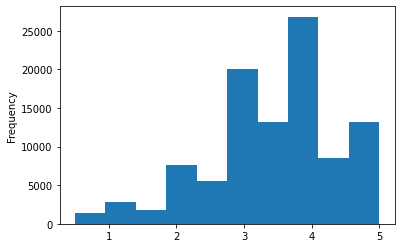

In [0]:
#plotando um histograma
notas.nota.plot(kind='hist')

In [0]:
#descrevendo os dados
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

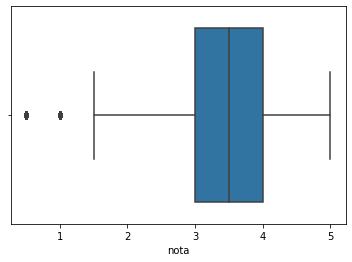

In [0]:
#plotando um boxplot
import seaborn as sns
sns.boxplot(notas.nota)

#Aula 2
#Análises iniciais

In [0]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##Analisando algumas notas específicas por filme

In [0]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [0]:
#Agrupando as notas por filme
notas.groupby('filmeId')

In [0]:
#tirando a média do DF agrupado
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

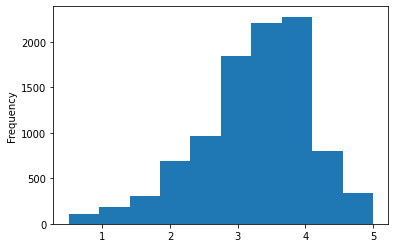

In [0]:
#plotando o medias_por_filme
medias_por_filme.plot(kind='hist')

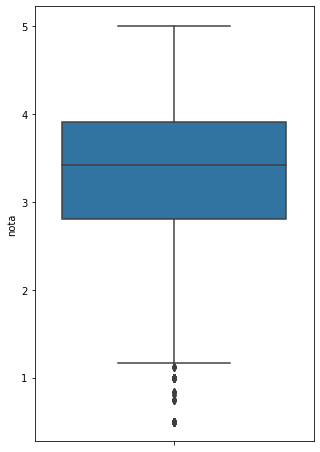

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [0]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

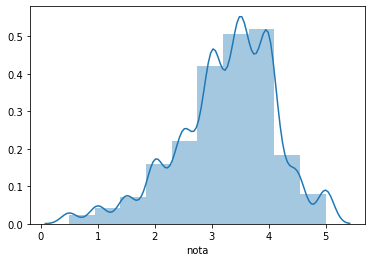

In [0]:
sns.distplot(medias_por_filme, bins=10)

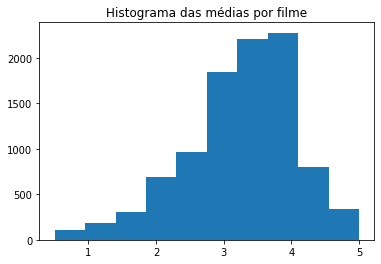

In [0]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title('Histograma das médias por filme')
plt.show()

#Aula 3
##Tipos de variáveis

In [0]:
#usando outra base de dados
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [0]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

###Tipos de variável

Afinal, o que são variáveis categóricas nominais e ordinais?

As variáveis categóricas são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.

Quando estamos trabalhando com categorias ordinais, existe uma ordenação entre as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.
ref.:http://leg.ufpr.br/~silvia/CE055/node8.html

In [0]:
#variável categórica nominal
#não é numérica
#não possui valor
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
#primeiro grau < 2 grau < 3 grau - variável categórica ordinal
#não faz operações aritméticas

In [0]:
#budget => quantitativo contínua
#quantidade de votas => 1,2,3,4 => quantitativa intervalar

#Aula 4
##Data Visualization

###Visualizar informação de variável categórica nominal

In [0]:
#as línguas são o índice, e os números valores
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ro       2
ar       2
cs       2
id       2
ta       2
vi       1
nb       1
ky       1
af       1
pl       1
tr       1
te       1
el       1
no       1
hu       1
is       1
xx       1
ps       1
sl       1
Name: original_language, dtype: int64

In [0]:
#transformando em DF e criando índice
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ['original_language', 'total']
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


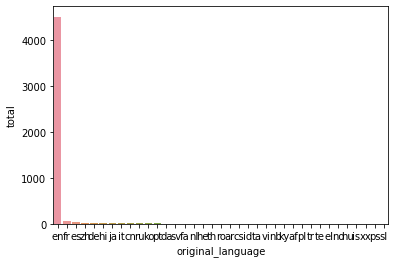

In [0]:
#visualizar as categorias para comparar.
sns.barplot(x='original_language', y='total', data=contagem_de_linguas)

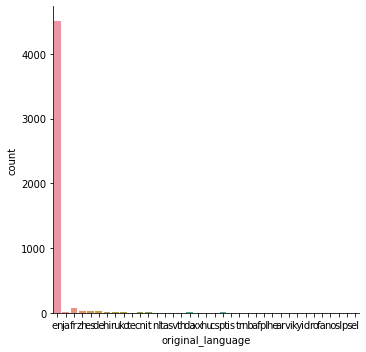

In [0]:
sns.catplot(x='original_language', data= tmdb, kind='count')

In [0]:
#importanto versões superiores ou não comportadas no colab
#!pip install programa==versão (ex.: !pip install seaborn==0.9.0)
#é necessário reiniciar o runtime e subir novamente os arquivos
print(sns.__version__)

0.10.1


<function matplotlib.pyplot.show>

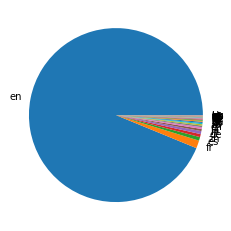

In [0]:
#não é indicado - difícil visualização
plt.pie(contagem_de_linguas['total'], labels = contagem_de_linguas['original_language'])
plt.show

In [0]:
#isolando dados
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_ingles
print('Total em ingles:', total_ingles)
print('Total do resto:', total_do_resto)
print('Total geral:', total_geral)


Total em ingles: 4505
Total do resto: 298
Total geral: 4803


In [0]:
#criando um DF usando o dicionáriu do python
dados ={
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


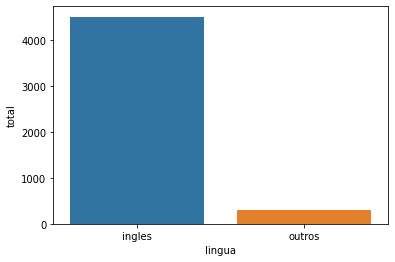

In [0]:
#plotando o novo DF
sns.barplot(x='lingua', y='total', data=dados)

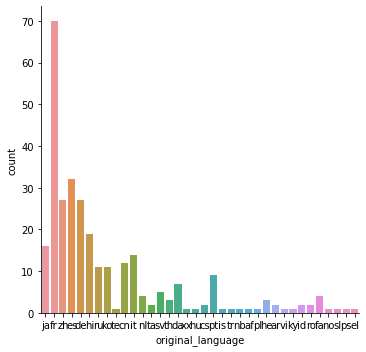

In [0]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language!= 'en'")
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles)

#Aula 5 
##Melhorando a visualização

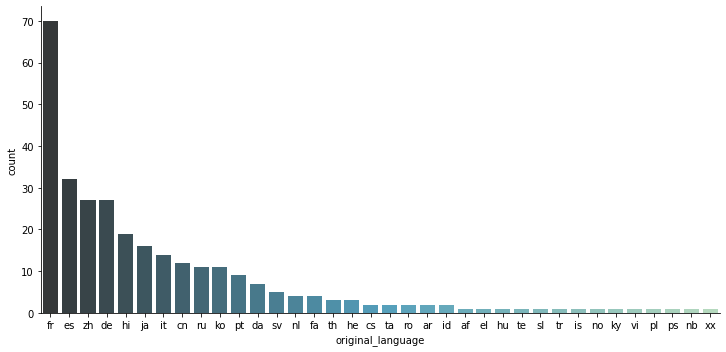

In [0]:
#plt.figure(figsize=(5,10)) - não funciona com o catplot (uma função de mais alto nível)
#incluindo parâmetros no gráfico anterior (final da aula 4)
sns.catplot(x='original_language',
            kind='count',
            data=filmes_sem_lingua_original_em_ingles,
            aspect=2,
            order=total_por_lingua_de_outros_filmes.index,
            palette='GnBu_d')

#Aula 6
##Dados e Estatística
**Revisando o papel de média, mediana, desvio padrão, histograma, dispersão de dados**

In [0]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
#comparando a quantidade de notas dadas por filme
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [0]:
#mostrando as médias
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [0]:
#mostrando as medianas
print("Mediana das notas do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana das notas do Jumanji %.2f" % notas_do_jumanji.nota.median())

Mediana das notas do Toy Story 4.00
Mediana das notas do Jumanji 3.50


In [0]:
#Desvio padrão
print("Desvio padrão da nota do Toy Story:", notas_do_toy_story.nota.std())
print("Desvio padrão da nota do Jumanji:",notas_do_jumanji.nota.std())
    

Desvio padrão da nota do Toy Story: 0.8348591407114045
Desvio padrão da nota do Jumanji: 0.8817134921476455


In [0]:
#criando um array do numpy
import numpy as np

np.array([2.5] * 10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

###mostrando como números únicos fazem perder a distribuição das notas

In [0]:
#trabalhando com array do numpy
#criando filmes com distribuições de notas distintas
#filme1 - média/média pra baixo
np1 = np.array([2.5] * 10)
np2 = np.array([3.5] * 10)

filme1 = np.append(np1, np2)

#filme2 - do tipo ame ou odeie
np3 = np.array([5] * 10)
np4 = np.array([1] * 10)

filme2 = np.append(np3, np4)

In [0]:
print("média dos filmes 1 e 2        :", filme1.mean(), "/", filme2.mean())
print("mediana dos filmes 1 e 2      :", np.median(filme1), "/", np.median(filme2))
print("Desvio padrão dos filmes 1 e 2:",np.std(filme1), "/", np.std(filme2))

média dos filmes 1 e 2        : 3.0 / 3.0
mediana dos filmes 1 e 2      : 3.0 / 3.0
Desvio padrão dos filmes 1 e 2: 0.5 / 2.0


###visualizando as distribuições

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

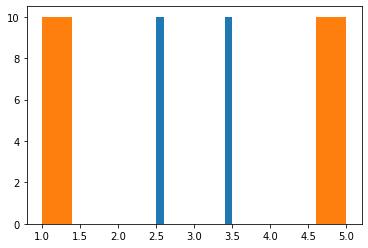

In [0]:
plt.hist(filme1)
plt.hist(filme2)

<function matplotlib.pyplot.show>

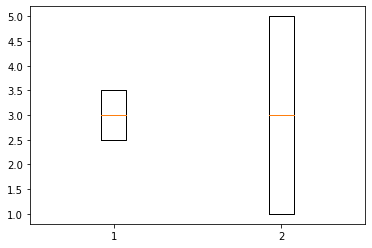

In [0]:
#boxplot filme 1 e filme 2
plt.boxplot([filme1, filme2])
plt.show

<function matplotlib.pyplot.show>

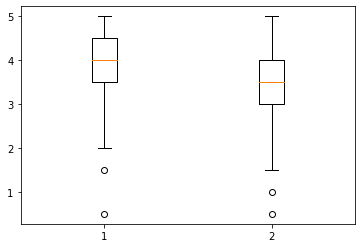

In [0]:
#comparando notas Toy Story e Jumanji
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])
plt.show

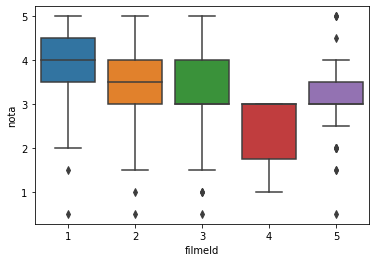

In [0]:
#fazendo boxplot de 4 filmes
sns.boxplot(x='filmeId', y='nota', data = notas.query('filmeId in [1,2,3,4,5]'))

Vamos falar um pouco sobre dispersão de dados e desvio padrão. Em estatística, dispersão de dados pode ser chamada de variabilidade ou espalhamento e são dados estatísticos para mostrar uma determinada variação de dados, e com esses dados é possível obter a variância, o desvio padrão e a amplitude interquartil.

Mas vamos demonstrar um exemplo de desvio padrão em uma sala de aula pensando na quantidade de aulas assistidas e de alunos que vão a aula. Teremos o seguinte bloco:

Quantidade de aulas assistidas	Quantidade de alunos

2                              	1


4                             	2

5	                              1

6	                              1

Temos o desvio padrão quando temos 2 alunos com a quantidade 4 de aulas assistidas! E nas outras quantidades de aulas assistidas temos apenas 1 aluno participando, sendo assim temos um desvio quando temos 2 alunos com a quantidade de 4 aulas assistidas, porque ele quebra o padrão de ter um aluno por aula.
ref: https://pt.wikipedia.org/wiki/Dispers%C3%A3o_estat%C3%ADstica